In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import warnings
from sklearn.exceptions import ConvergenceWarning
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import l2

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

In [2]:
#Importing the dataset 
df=pd.read_csv("/home/umair/Desktop/Data Science and BI/data mining/occupancy_data/DataCleaned.csv")
test=pd.read_csv("/home/umair/Desktop/Data Science and BI/data mining/occupancy_data/DataCleanedTest.csv")
test2=pd.read_csv("/home/umair/Desktop/Data Science and BI/data mining/occupancy_data/DataCleanedTest2.csv")


In [3]:
#Drop the useless column
df.drop(['Unnamed: 0'], axis=1, inplace =True)
df.drop(['date'], axis=1, inplace =True)
df.drop(['DayName'], axis=1, inplace =True)

test.drop(['Unnamed: 0'], axis=1, inplace =True)
test.drop(['date'], axis=1, inplace =True)
test.drop(['DayName'], axis=1, inplace =True)

test2.drop(['Unnamed: 0'], axis=1, inplace =True)
test2.drop(['date'], axis=1, inplace =True)
test2.drop(['DayName'], axis=1, inplace =True)

In [4]:
#preparing the two datasets splitting the attributes with the class and selecting the right attributes
attributes = [col for col in df.columns if col != 'Occupancy']
X_train = df[attributes]
y_train = df['Occupancy']

attributes = [col for col in test.columns if col != 'Occupancy']
X_test = test[attributes]
y_test = test['Occupancy']

attributes = [col for col in test2.columns if col != 'Occupancy']
X_test2 = test2[attributes]
y_test2 = test2['Occupancy']

In [5]:
warnings.simplefilter("ignore")

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [7]:
def build_model():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(60, input_dim=n_feature, activation='sigmoid'))
    model.add(Dense(40, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [8]:
es = EarlyStopping(monitor='val_loss', patience=10)
mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_loss', save_best_only=True)

model = build_model()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, 
                      batch_size=10, callbacks=[es,mc]).history

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 6514 samples, validate on 1629 samples
Epoch 1/100
6514/6514 [==============================] - 2s 271us/step - loss: 0.3869 - accuracy: 0.8305 - val_loss: 0.2612 - val_accuracy: 0.9392
Epoch 2/100
6514/6514 [==============================] - 1s 172us/step - loss: 0.1875 - accuracy: 0.9368 - val_loss: 0.1826 - val_accuracy: 0.9392
Epoch 3/100
6514/6514 [==============================] - 1s 172us/step - loss: 0.1623 - accuracy: 0.9391 - val_loss: 0.1589 - val_accuracy: 0.9374
Epoch 4/100
6514/6514 [==============================] - 1s 174us/step - loss: 0.1475 - accuracy: 0.9450 - val_loss: 0.2017 - val_accuracy: 0.9355
Epoch 5/100
6514/6514 [==============================] - 2s 244us/step - loss: 0.1398 - accuracy: 0.9495 - val_loss: 0.1474 - val_accuracy: 0.9497
Epoch 6/100
6514/6514 [==============================] - 1s 192us/step - loss: 0.1367 - accuracy:

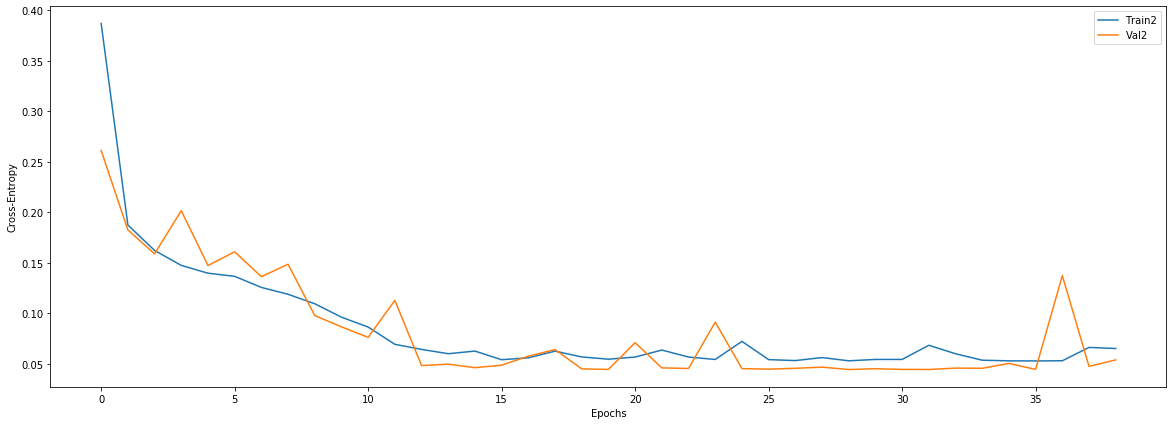

In [10]:
plt.figure(figsize=(20,7))
#plt.plot(history1['loss'], label='Train1')
#plt.plot(history1['val_loss'], label='Val1')
plt.plot(history['loss'], label='Train2')
plt.plot(history['val_loss'], label='Val2')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()